pygame 2.1.2 (SDL 2.0.18, Python 3.10.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


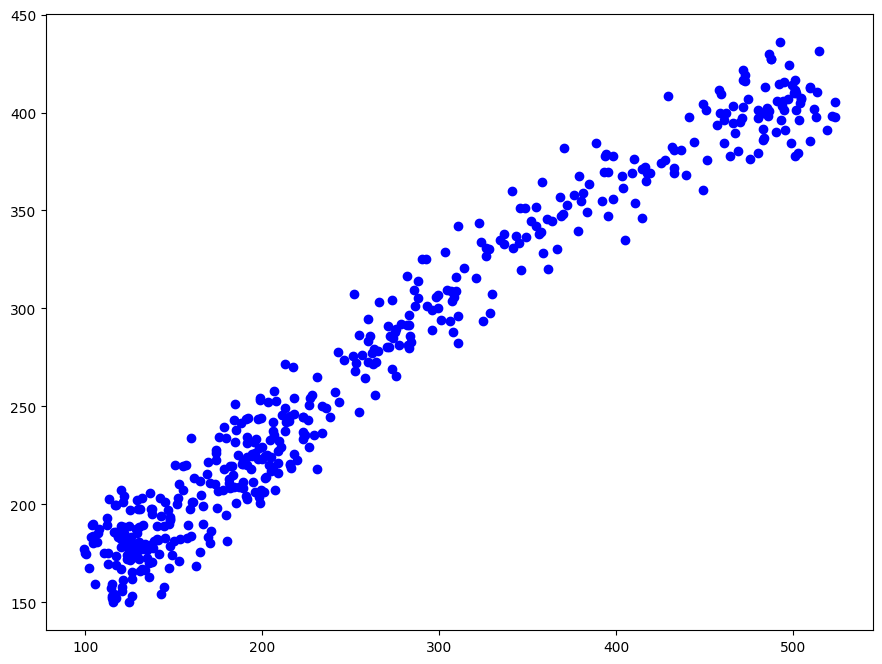

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygame

points = {'data':np.empty((0,1), dtype='f'), 'targets':np.empty((0,), dtype='f')}
    
c_radius = 3
c_color = (0,0,255)
c_thickness = 0 
jet_radius = 30
jet_thr = .5

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("data generator")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing and np.random.uniform(0,1)>jet_thr:        
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0,jet_radius)
        phi = np.random.uniform(0,2*np.pi)
        coord = [x+r*np.cos(phi), height-(y+r*np.sin(phi))]
        points['data'] = np.append(points['data'], [[coord[0]]], axis=0)
        points['targets'] = np.append(points['targets'], coord[1])
            
    screen.fill(bg_color)
    for X,y in zip(points['data'], points['targets']):
        pygame.draw.circle(screen,c_color,(int(X[0]),height-int(y)),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points['data'][:,0],points['targets'],c="blue")
plt.show()

In [3]:
X = points['data']
y = points['targets']

0.9611298193357826
102.9741979378069 [0.63285385]
[103.29062486]


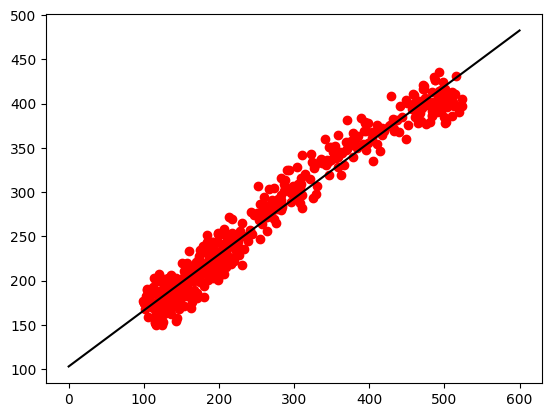

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.intercept_, reg.coef_)
print(reg.predict(np.array([[.5]])))

X_test = np.array([0, 600])
y_test = reg.intercept_ + reg.coef_[0]*X_test

plt.figure()
plt.scatter(X, y, c='red')
plt.plot(X_test, y_test, c='black')
plt.show()

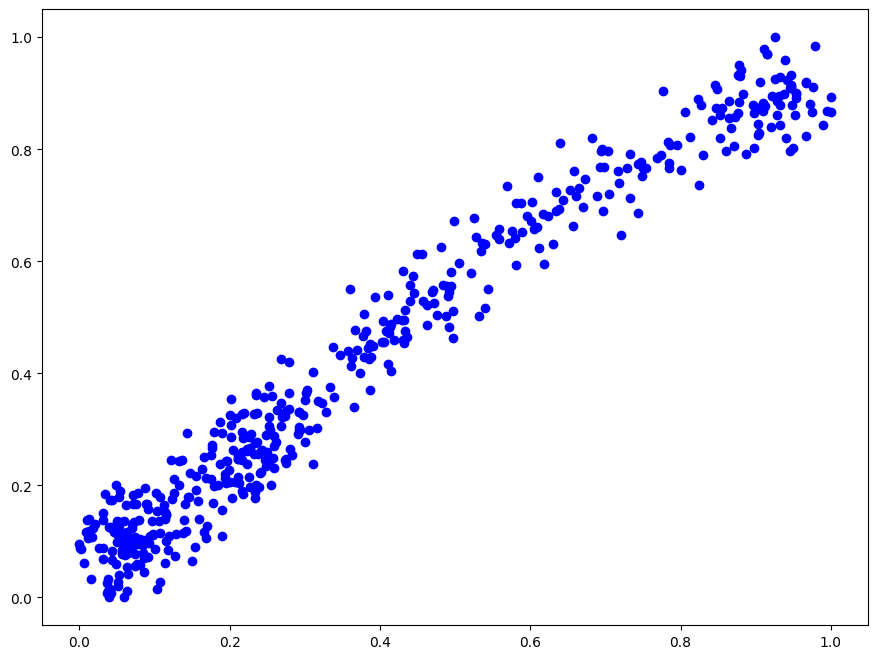

In [5]:
X_max, X_min = X.max(), X.min()
X_norm = (X - X_min) / (X_max - X_min)

y_max, y_min = y.max(), y.min()
y_norm = (y - y_min) / (y_max - y_min)

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(X_norm[:,0],y_norm,c="blue")
plt.show()

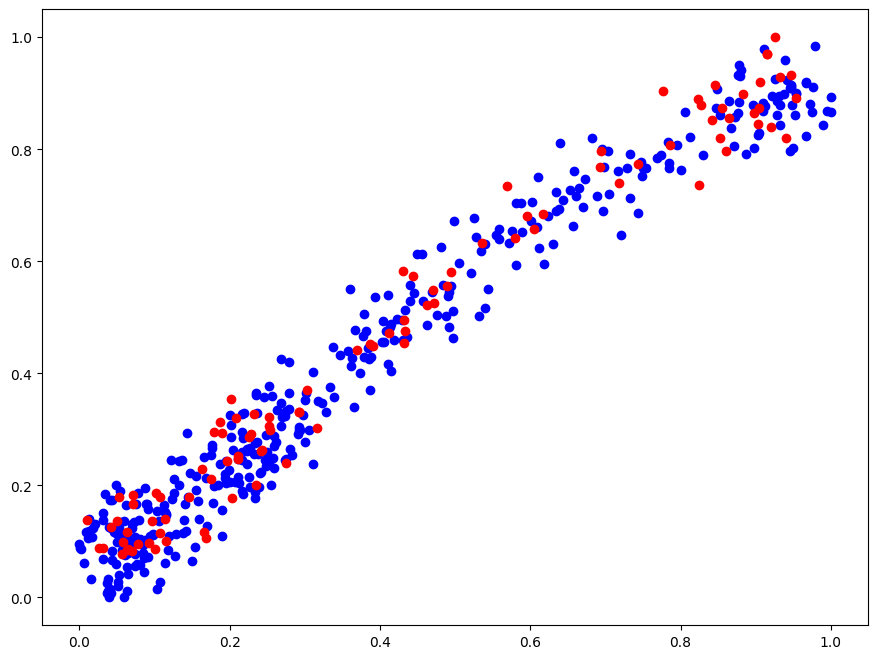

In [6]:
N = len(y_norm)

# 80% от всех данных - обучающая выборка
pointer = int(N*.8)
#print(pointer)

indx = np.arange(N)
np.random.shuffle(indx)

#print(indx)

X_train, y_train = X_norm[indx[:pointer]], y_norm[indx[:pointer]]
X_test,  y_test  = X_norm[indx[pointer:]], y_norm[indx[pointer:]]

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(X_train[:,0],y_train,c="blue")
plt.scatter(X_test[:,0],y_test,c="red")
plt.show()

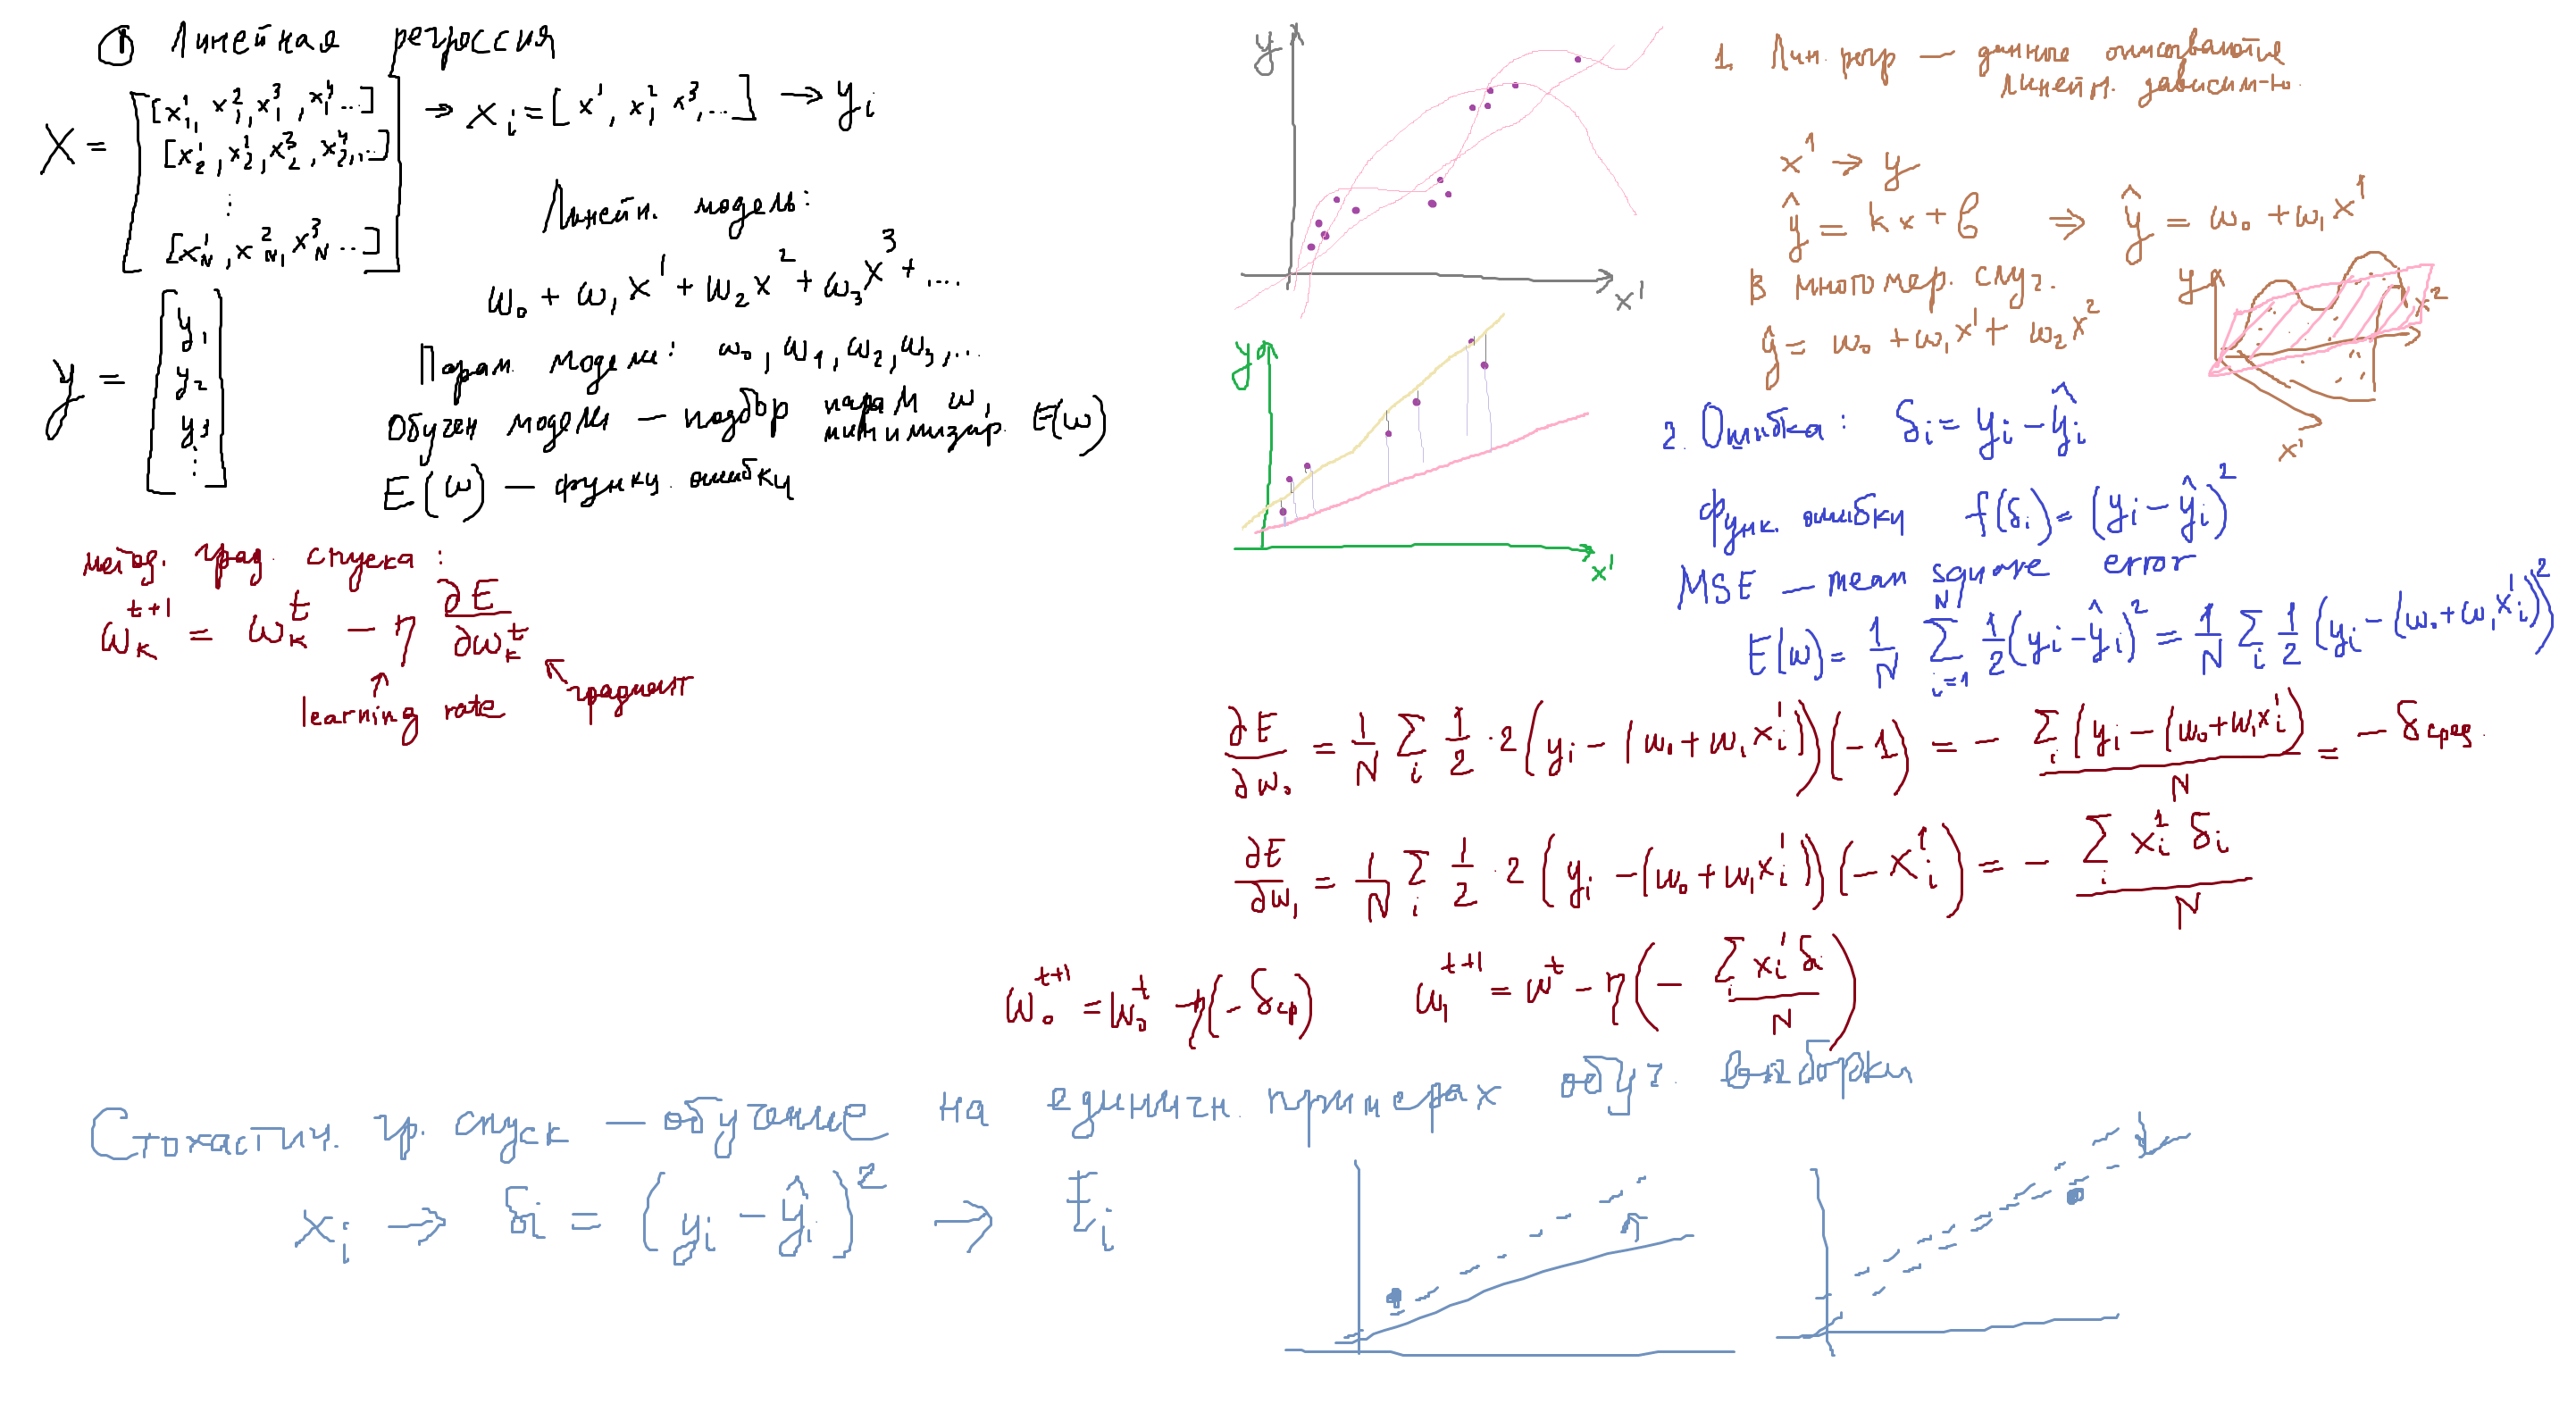

[0.13545123 0.73468208]


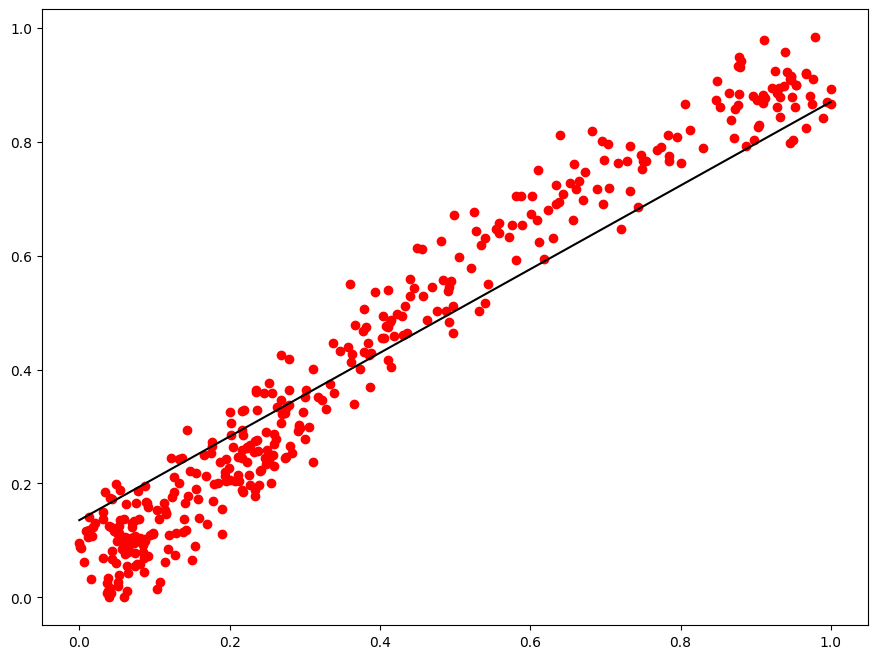

MSE: 0.0036811751940753062


In [7]:
epochs = 1000
eta = .01

w = np.random.rand(2)

for epoch in range(epochs):
    dE_dw0, dE_dw1 = 0, 0
    for X,y in zip(X_train, y_train):
        y_hat = w[0] + w[1]*X[0]
        delta = y - y_hat
        dE_dw0 += delta
        dE_dw1 += delta*X[0]
    dE_dw0 = -dE_dw0/len(y_train)
    dE_dw1 = -dE_dw1/len(y_train)
    w[0] -= eta*dE_dw0
    w[1] -= eta*dE_dw1
    
print(w)

X_line = np.array([0, 1])
y_line = w[0] + w[1]*X_line

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(X_train, y_train, c='red')
plt.plot(X_line, y_line, c='black')
plt.show()

E = 0
for X,y in zip(X_test, y_test):
    y_hat = w[0] + w[1]*X[0]
    delta = y - y_hat
    E += .5*delta**2
E = E/len(y_test)
print('MSE:', E)

In [45]:
y_ = y_train.reshape((len(y_train),1))
#print(y_train, y_)

y_hat = X_train*w[1] + w[0]

delta = y_ - y_hat

dE_dw0 = -delta.mean()

print(dE_dw0)                     

0.0026725770847286817


## ДЗ (необязательное)

1. Написать свой класс для модели линейной регрессии.
2. Описать метод predict() для использования обученной модели.
3. Решить проблему масштабирования данных: для корректной работы алгоритма данные должны быть нормированы, но для дальнейшего прогнозирования данные должны подаваться в исходном не отмасштабированном виде.
4. Модель должна работать с данными любой размерности (любым количеством признаков).
5. Операции должны быть максимально векторизованы (то есть не нужно в цикле проходить по всем объектам, а нужно одновременно обрабатывать все в матричном виде).

In [8]:
def mse(a: np.ndarray, b: np.ndarray):
    return (a - b) ** 2 / a.shape[0]


class LinearRegression:
    def __init__(self, step=0.01, max_steps=1000, eps=1e-4):
        self._step = step
        self._max_steps = max_steps
        self._eps = eps
        self._weights = None


    def fit(self, x: np.ndarray, y: np.ndarray):
        x = self._prepare(x)
        self._weights = np.random.randn(x.shape[1])
        for i in range(self._max_steps):
            prediction = self._predict_prepared(x)


    def predict(self, x: np.ndarray):
        x_normalized = self._prepare(x)
        return self._predict_prepared(x_normalized)

    def _predict_prepared(self, x: np.ndarray):
        return x @ self._weights

    @staticmethod
    def _prepare(x: np.ndarray):
        return np.column_stack([LinearRegression._normalize(x), np.ones(x.shape[0])])

    # noinspection PyArgumentList
    @staticmethod
    def _normalize(x: np.ndarray):
        columnwise_min = x.min(axis=0)
        columnwise_max = x.max(axis=0)
        columnwise_delta = columnwise_max - columnwise_min

        return (x - columnwise_min) / columnwise_delta
